<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time 
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
rating_data = pd.io.parsers.read_csv('ratings.dat',
                                     names=['user_id','movie_id','rating','time'],
                                     delimiter="::")

movie_data = pd.io.parsers.read_csv('movies.dat',
                                     names=['movie_id','title','genre'],
                                     delimiter="::")

user_data = pd.io.parsers.read_csv('users.dat',
                                     names=['user_id','gender','age','occupation','zipcode'],
                                     delimiter="::")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyth

In [ ]:

rating_data.head()

user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Step 2 데이터 분석

In [ ]:
movie_data.head()


,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
# 총 영화의 개수 (고유)

print("Total Movie : ",len(movie_data['movie_id'].unique()))
print("Total Movie : ",len(movie_data['title'].unique()))

Total Movie :  3883
Total Movie :  3883


In [ ]:
# 연도별 영화 개수가 많은 10개 연도

movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])

In [ ]:
movie_data.head()


,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
# 연도별 영화 개수가 많은 Top 10 연도 출력
movie_data['year'].value_counts().head(10)


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


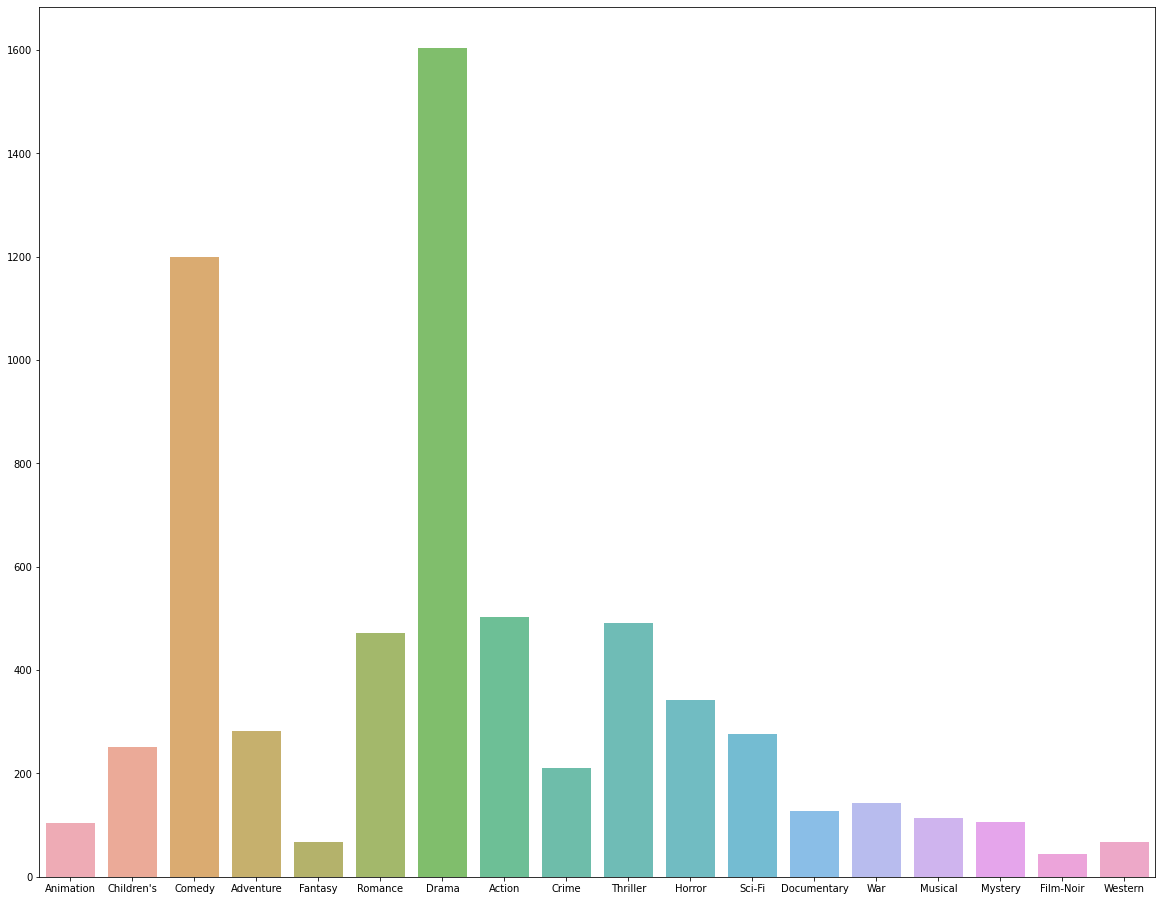

In [ ]:
# 가장 많이 등장한 장르의 속성

unique_genre_dict = {}

for index, row in movie_data.iterrows():
  genre_combition = row['genre']
  parsed_genre = genre_combition.split("|")

  for genre in parsed_genre:
    if genre in unique_genre_dict:
      unique_genre_dict[genre] += 1
    else:
      unique_genre_dict[genre] = 1
  # 구분자 | 분리한 장르의 속성을 unique_genre_dict 각각 계산하여 저장한다.


plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.show()



In [ ]:
# 각 영화가 평가 받은 횟수

movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values

print(movie_rate_count)

[707 246 196 ...  32  31 240]


Total : 3883


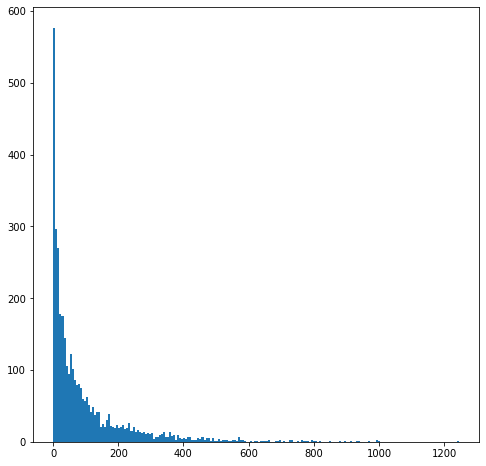

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins=200)
print("Total :",len(movie_data['movie_id'].unique()))

In [ ]:
# 각 영화당 평점
# movie_grouped = rating_data.groupby('movie_id')['rating'].agg(
#     {'rated_count':'count','rating_mean':'mean'}) 



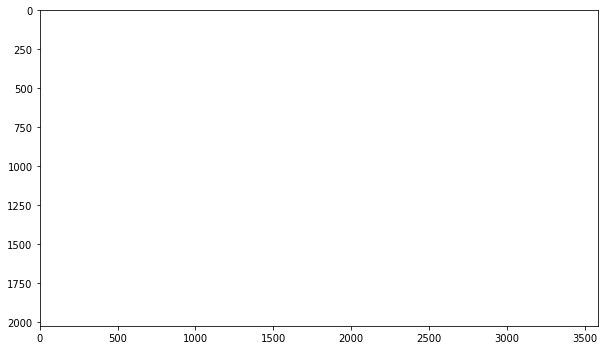

In [ ]:
# 영화 평점 예측



# user-movie 표로 만들기

rating_table = rating_data[['user_id','movie_id','rating']].set_index(["user_id","movie_id"]).unstack()

# 시각화

plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(rating_table)
plt.grid(False)

# 대부분의 공간에 색이 없는 행렬(희소 행렬) 대부분의 Rating점수가 아직 채워지지 않았음을 의미






In [ ]:
######################################
# step 4 예측 : 수학적 기법을 활용
######################################
#1.회귀분석 2.시계열 3.수학적기법(행렬완성/행렬분석)


In [ ]:
# 행렬완성 -> 행렬분해 방법 사용, 행렬 분해는 수학적 성질을 이용해서 
# 하나의 행렬을 여러개의 행렬 곱을 나타내는 방법
# 여기서는 행렬분해 중에서 가장 많이 활용되는 '특이값 분해(SVD)' 방법을 활용

# A행렬 = U행렬*S행렬*V행렬

# 1) 3개로 나눠진 행렬 u,s,v 의 값을 임의 숫자/문자로 초기화 ex) ?
# 2) 임의의 값으로 채워진 3대 행렬을 곱해서 새로운 행렬 A'를 계산한다. 
# 3) 새롭게 만들어진 A'의 값 그리고 원래 행렬 A의 값을 비교
# 4) 이 값들이 최대한 비슷해지는 "?"를 학습한 뒤, 행렬 A'빈공간에 채워 넣는다. 

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 333kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670907 sha256=9f7d70aca3f8ea50853602a33b546d4b40ed5d76159737f1c53eb19b1f13f6dd
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:

# SVD 라이브러리를 사용하기 위해서 학습 데이터 생성

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data = data.build_full_trainset()




In [ ]:
# SVD모델 학습

train_start = time.time()

model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("time :%.2f seconds" % (train_end - train_start))

time :25.61 seconds


In [ ]:
# 학습한 모델의 평점 예측 결과를 보자

target_user_id = 4  # 홍길동
target_user_data = rating_data[rating_data['user_id']==target_user_id] # 평가한 영화들
target_user_data.head(10) 


In [ ]:
# 4번 유저가 평가한 영화 목록 추출 movie_id : rating

target_user_movie_rating_dict = {}

for index,row in target_user_data.iterrows():
  movie_id = row['movie_id']
  target_user_movie_rating_dict[movie_id] = row['rating']

print(target_user_movie_rating_dict)

In [ ]:
# 예측 모델에 4번 유저의 정보를 입력해서 '아직 보지도 않은 영화들의 평점'을 예측해보자
# model.test() 입력은 리스트로 넣어주자.

# 타겟 id 4 인 유저가 보지도 않은 영화 정보를 생성

test_data=[]
for index, row in movie_data.iterrows():
  movie_id = row['movie_id']
  rating= 0
  if movie_id in target_user_movie_rating_dict:
    continue
  test_data.append((target_user_id, movie_id, rating))

target_user_predictions = model.test(test_data)


